<a href="https://colab.research.google.com/github/Julianfried/Diplomatura-en-IA-Instituto-Humai/blob/main/Machine%20Learning/Clase_10_Ejercicios_Aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/machine_learning/blob/main/10_AprendizajeNoSupervisado/ejercicios/ejercicios.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

## *Instalación de la librería*

In [1]:
!pip install pyeph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=59d265a1a8062739804746f2c747ca0f95f800e2203e679f6c6b84c84d6e0c52
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.


In [2]:
import pyeph
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import numpy as np


## *Obtención de las bases de datos*

In [3]:
eph = pyeph.get(data="eph", year=2021, period=2, tipo_base='hogar')
canastas = pyeph.get(data="canastas") # canasta basica total y alimentaria
adequi = pyeph.get(data="adulto-equivalente") # adulto equivalente


Obtenido con exito: base_hogar_2021T2.zip 


CBT y CBA mas actualizada que se obtuvo: 2022-12 

Obtenido con exito: adulto_equivalente.zip 


In [4]:
eph.head(10)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOSRWHKMLOCDEFMDB00652779,2021,2,1,1,43,N,6,176,1,...,NaN,12.0,12,0,1,0,98,0,0,0
1,TQRMNOPQSHMMLPCDEFMDB00698578,2021,2,1,1,43,N,6,272,1,...,NaN,9.0,9,430,2,1,98,0,0,0
2,TQRMNOPXXHMMLPCDEFMDB00698579,2021,2,1,1,43,N,6,97,1,...,NaN,7.0,6,138,2,0,1,0,0,0
3,TQRMNOPUYHJNKOCDEHJGH00658556,2021,2,3,1,40,S,23,137,2,...,0.0,NaN,0,136,1,0,98,0,0,0
4,TQRMNOSWSHLMKSCDEGLDF00708542,2021,2,1,1,41,N,15,154,1,...,NaN,9.0,10,182,1,0,2,0,0,0
5,TQRMNOSWUHLMKSCDEGLDF00708543,2021,2,1,1,41,N,15,289,1,...,NaN,1.0,1,333,1,0,98,0,0,0
6,TQRMNOSQVHKLKTCDEGJBF00653682,2021,2,1,1,43,S,13,767,1,...,10.0,NaN,10,769,2,0,98,0,0,0
7,TQRMNORQRHLOKTCDEGJBF00708544,2021,2,1,1,43,S,13,832,1,...,5.0,NaN,6,828,1,0,97,0,0,0
8,TQRMNOQPSHKKLNCDEGJBF00653676,2021,2,1,1,43,S,13,1232,2,...,10.0,NaN,10,1317,1,2,98,0,0,0
9,TQRMNOQQXHLLLOCDEGJBF00708545,2021,2,1,1,43,S,13,500,2,...,7.0,NaN,7,510,1,0,98,0,0,0


In [5]:
eph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 88 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODUSU      15620 non-null  object 
 1   ANO4        15620 non-null  int64  
 2   TRIMESTRE   15620 non-null  int64  
 3   NRO_HOGAR   15620 non-null  int64  
 4   REALIZADA   15620 non-null  int64  
 5   REGION      15620 non-null  int64  
 6   MAS_500     15620 non-null  object 
 7   AGLOMERADO  15620 non-null  int64  
 8   PONDERA     15620 non-null  int64  
 9   IV1         15620 non-null  int64  
 10  IV1_ESP     21 non-null     object 
 11  IV2         15620 non-null  int64  
 12  IV3         15620 non-null  int64  
 13  IV3_ESP     25 non-null     object 
 14  IV4         15620 non-null  int64  
 15  IV5         15620 non-null  int64  
 16  IV6         15620 non-null  int64  
 17  IV7         15620 non-null  int64  
 18  IV7_ESP     11 non-null     object 
 19  IV8         15620 non-nul

In [6]:
eph.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

Vemos columnas de interes en la documentación de la encuentas
https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_4T2021.pdf

In [7]:
columnas = ['REGION', 'MAS_500', 'AGLOMERADO', 'IV1', 'IV2', 'IV3', 'V4',  'IV5', 'IV6', 'IV7',
 'IV8', 'IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II4_3', 'II7', 'II8', 'II9',
 'ITF', 'IPCF', 'IX_TOT']

In [8]:
eph_redux = eph[columnas]

In [9]:
eph_redux['MAS_500'].head()

0    N
1    N
2    N
3    S
4    N
Name: MAS_500, dtype: object

Limpiamos un poco los datos

In [10]:
eph_redux['IPCF'] = eph_redux['IPCF'].apply(lambda x: x.replace(',', '.'))
eph_redux['IPCF'] = eph_redux['IPCF'].astype(float)
eph_redux['MAS_500'] = eph_redux['MAS_500'].apply(lambda x: 0 if x =='N' else 1)

<ipython-input-10-13b1177bd1b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_redux['IPCF'] = eph_redux['IPCF'].apply(lambda x: x.replace(',', '.'))
<ipython-input-10-13b1177bd1b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eph_redux['IPCF'] = eph_redux['IPCF'].astype(float)
<ipython-input-10-13b1177bd1b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [11]:
eph_redux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REGION      15620 non-null  int64  
 1   MAS_500     15620 non-null  int64  
 2   AGLOMERADO  15620 non-null  int64  
 3   IV1         15620 non-null  int64  
 4   IV2         15620 non-null  int64  
 5   IV3         15620 non-null  int64  
 6   V4          15620 non-null  int64  
 7   IV5         15620 non-null  int64  
 8   IV6         15620 non-null  int64  
 9   IV7         15620 non-null  int64  
 10  IV8         15620 non-null  int64  
 11  IV9         15620 non-null  int64  
 12  IV10        15620 non-null  int64  
 13  IV11        15620 non-null  int64  
 14  II1         15620 non-null  int64  
 15  II2         15620 non-null  int64  
 16  II3         15620 non-null  int64  
 17  II4_3       15620 non-null  int64  
 18  II7         15620 non-null  int64  
 19  II8         15620 non-nul

Graficamos algunas distribuciones

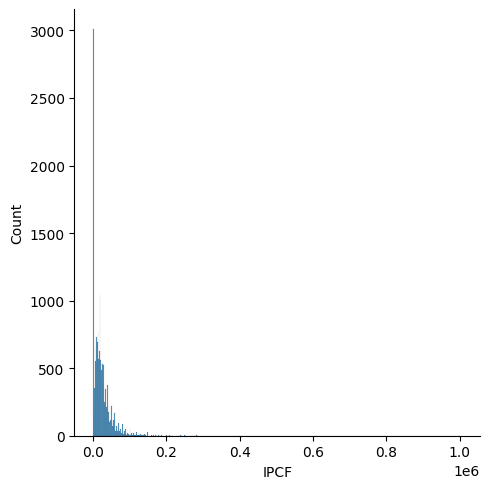

In [12]:
sns.displot(data=eph_redux, x="IPCF")

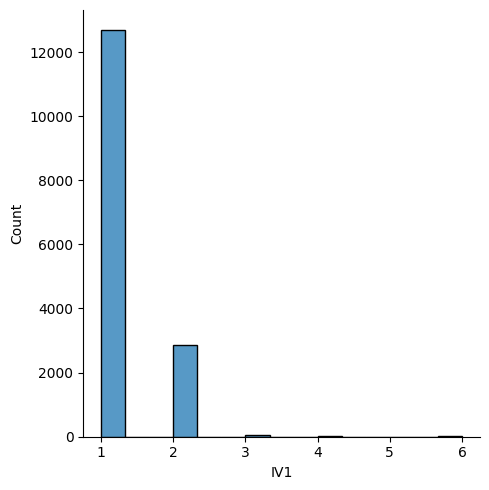

In [13]:
sns.displot(data=eph_redux, x="IV1")

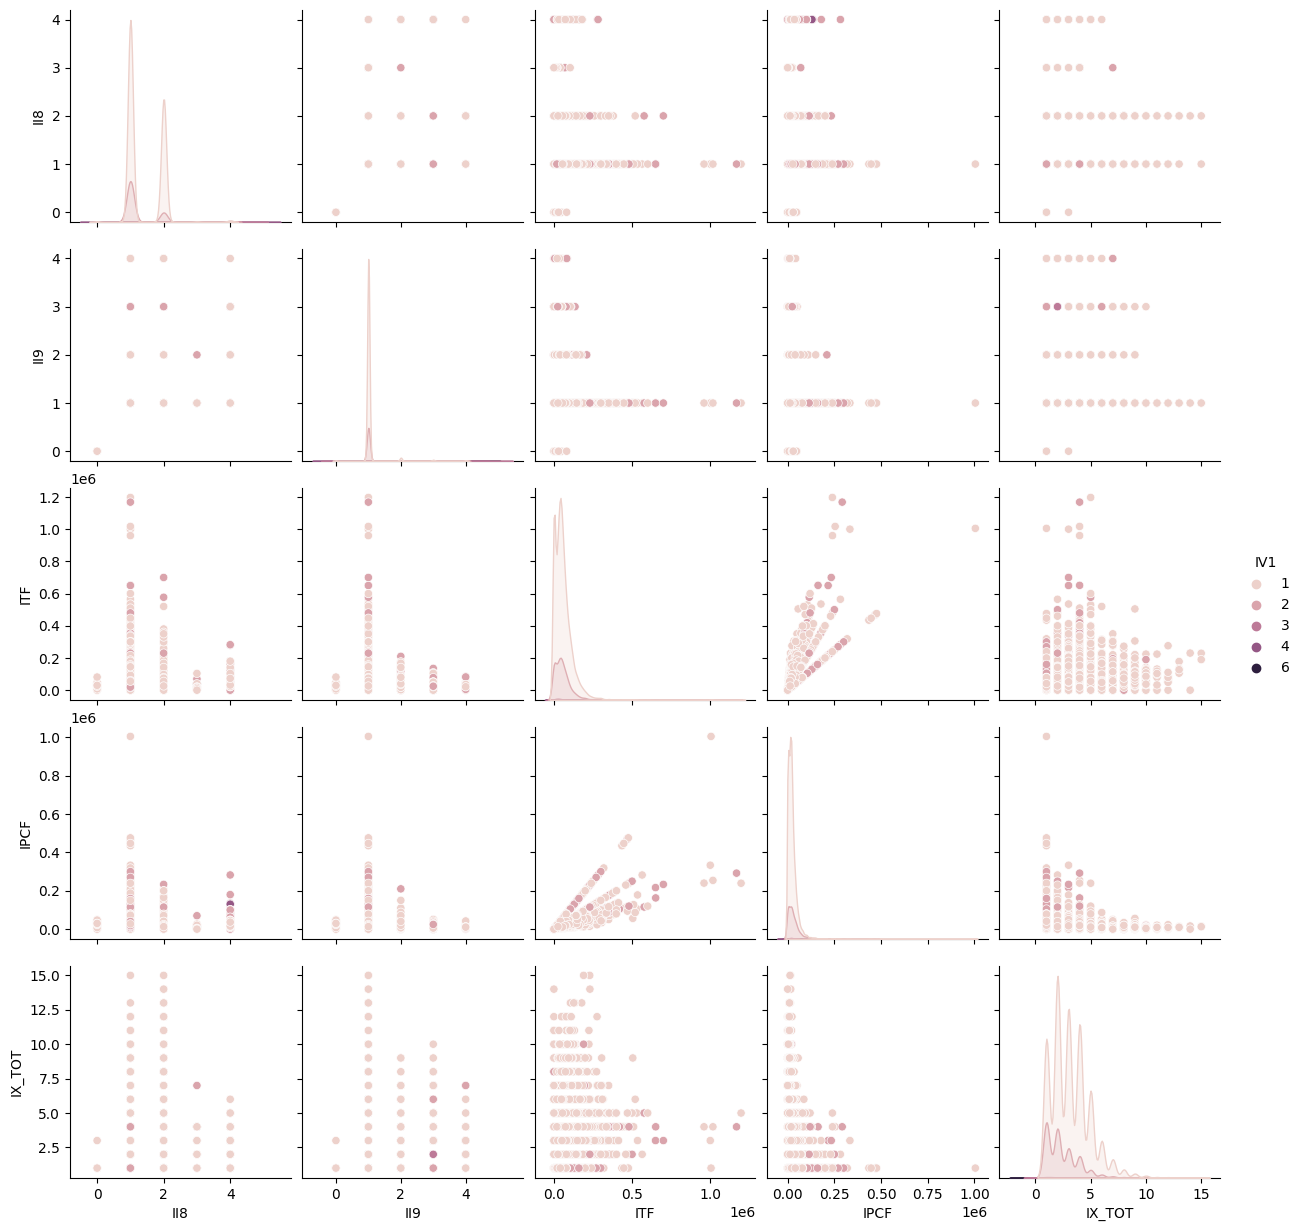

In [14]:
sns.pairplot(eph_redux[['II8', 'II9', 'ITF', 'IPCF', 'IX_TOT', "IV1"]], hue='IV1', )

# Reducción de dimensionalidades.

Suponiendo que tenemos conjuntos convexos podemos reducir dimensionalidad con PCA.
Pero utilizaremos otros métodos menos estudiados

In [15]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 689.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=e647ea9408cd7a6230d18a885aa057f520d7b78ff65d143654d1727ba284ad7e
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=55a3abd595fbebf59c42d1c586dee9dfb81d9f57f51f30b86ef8c30cbccdf88f
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [16]:
from umap import UMAP
import matplotlib.pyplot as plt

In [17]:
# Tomar EPH redux y aplicarle una normalización estandard con sci-kit learn
eph_redux_norm = StandardScaler().fit_transform(eph_redux)

# Instanciar UMAP con 2 y 3 componentes
features = eph_redux_norm

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)


# Aplicar UMAP

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

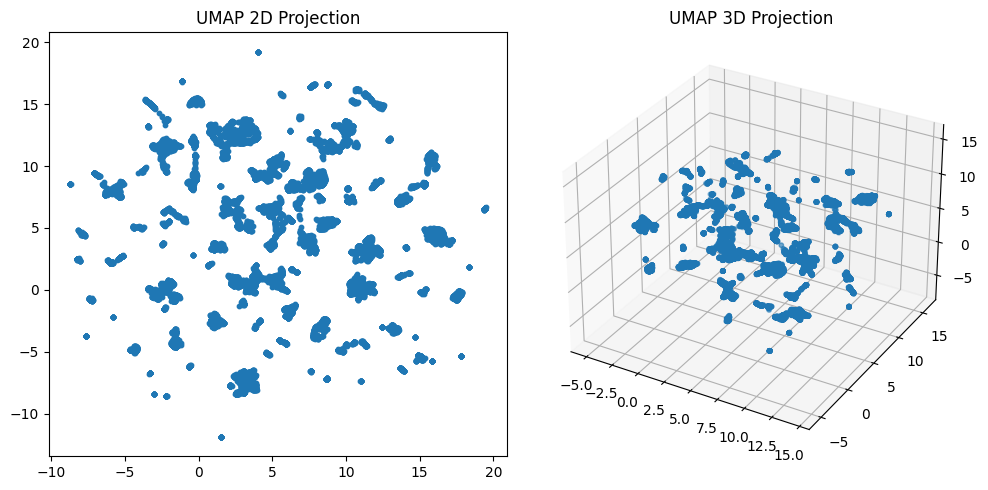

In [18]:
# Plot UMAP results in 2D
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(proj_2d[:, 0], proj_2d[:, 1], s=10)
plt.title("UMAP 2D Projection")

# Plot UMAP results in 3D
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(proj_3d[:, 0], proj_3d[:, 1], proj_3d[:, 2], s=10)
ax.set_title("UMAP 3D Projection")
plt.tight_layout()

## Clustering

Ver métodos de sci-kit learn en: https://scikit-learn.org/stable/modules/clustering.html

In [19]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score


In [21]:
# Aplicar Clustering con AffinityPropagation en los datos 2D
clustering = AffinityPropagation(preference=-50, random_state=0).fit(proj_2d)
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(proj_2d, labels, metric="sqeuclidean")
)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Estimated number of clusters: 10144
Silhouette Coefficient: 0.173


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

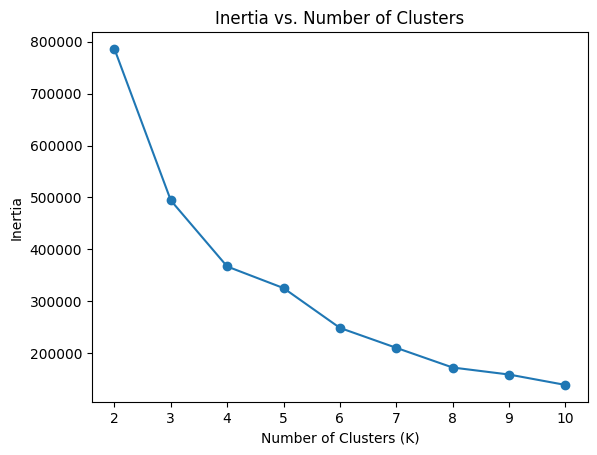

In [22]:
num_clusters_range = range(2, 11)  # You can adjust this range

inertia_values = []

# Step 4 and 5: Apply MiniBatchKMeans and calculate inertia
for num_clusters in num_clusters_range:
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=100)
    kmeans.fit(proj_2d)
    inertia_values.append(kmeans.inertia_)

# Step 6: Plot inertia values against K
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(num_clusters_range)
plt.show()